In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv

In [32]:
demand_df = read_csv("./data/uiuc_demand_data.csv", 
                     usecols=['time', 'kw'], 
                     parse_dates=True, 
                     index_col='time')
weather_df = read_csv("./data/champaign_weatherdata.csv", 
                      usecols=['time', 'pressure', 'wettemp', 'drytemp', 'humidity', 'windspeed'],
                      parse_dates=True, 
                      index_col='time')

In [33]:
demand_df['mw'] = demand_df['kw']/1000

In [34]:
# Plot Parameters
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['figure.edgecolor'] = 'k'
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['savefig.dpi'] = 400
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['axes.labelsize'] = 21
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['xtick.labelsize'] = 21
plt.rcParams['ytick.labelsize'] = 21
plt.rcParams['legend.fontsize'] = 16

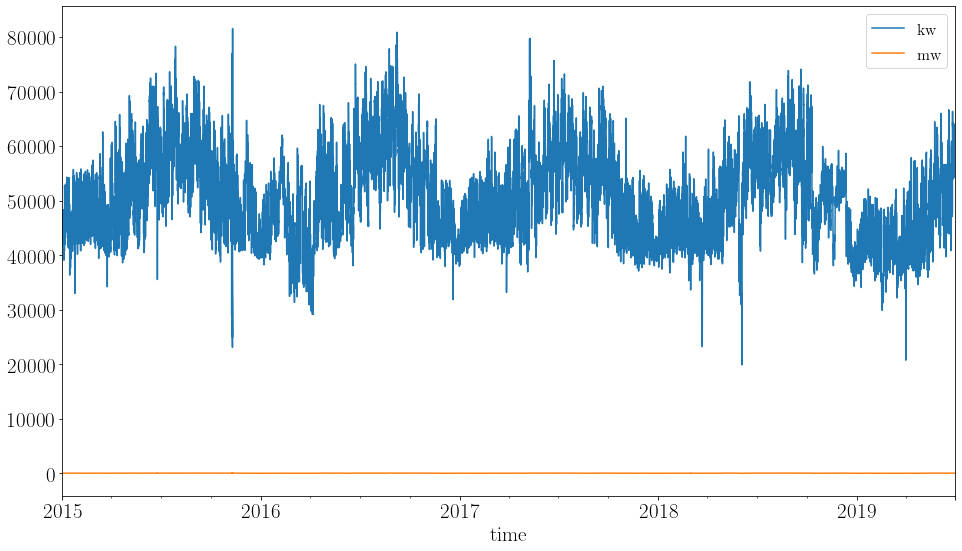

In [35]:
demand_df.plot()

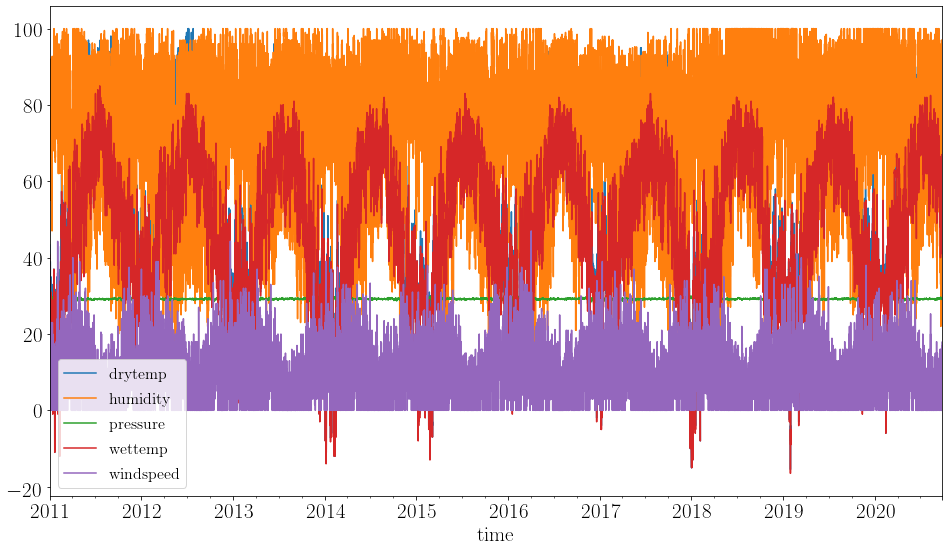

In [36]:
weather_df.plot()

In [37]:
combined_df = pd.concat([demand_df, weather_df], axis=1, join='inner')
combined_df.interpolate('linear', inplace=True)

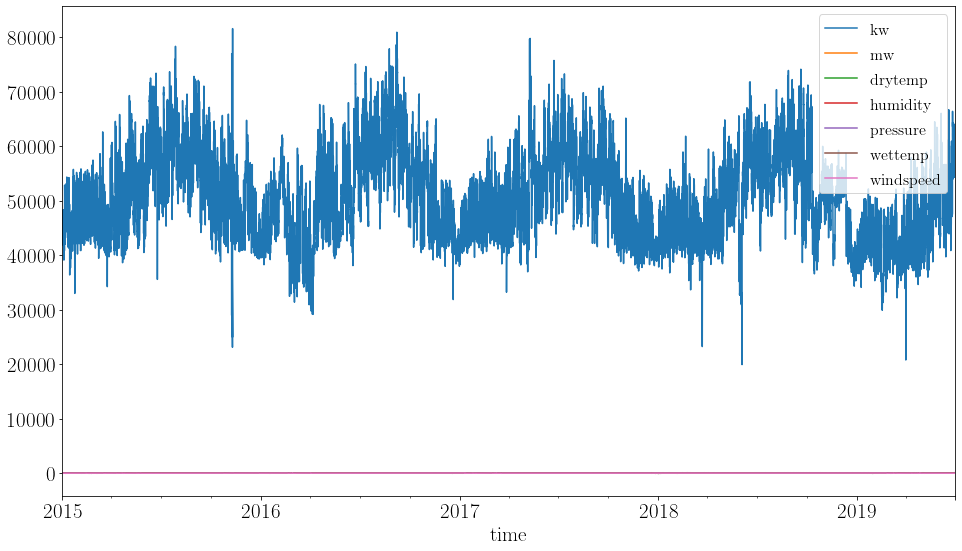

In [38]:
combined_df.plot()

In [39]:
# deltakw = np.diff(combined_df.kw)
deltamw = np.diff(combined_df.mw)
deltadt = np.diff(combined_df.drytemp)
deltawt = np.diff(combined_df.wettemp)
deltap = np.diff(combined_df.pressure)

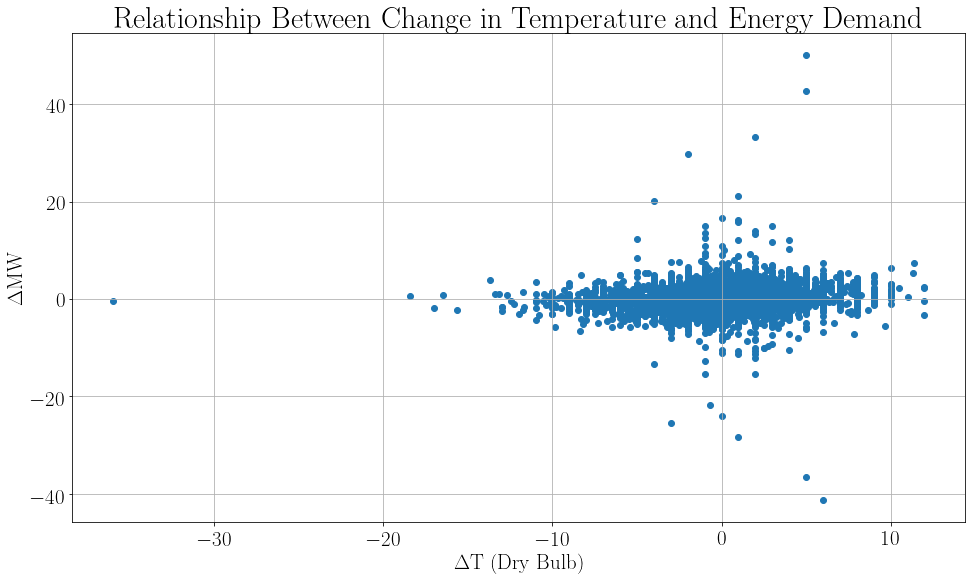

In [40]:
plt.scatter(deltadt, deltamw)
plt.xlabel(r"$\Delta$T (Dry Bulb)")
plt.ylabel(r"$\Delta$MW")
plt.title("Relationship Between Change in Temperature and Energy Demand")
plt.grid()
plt.show()

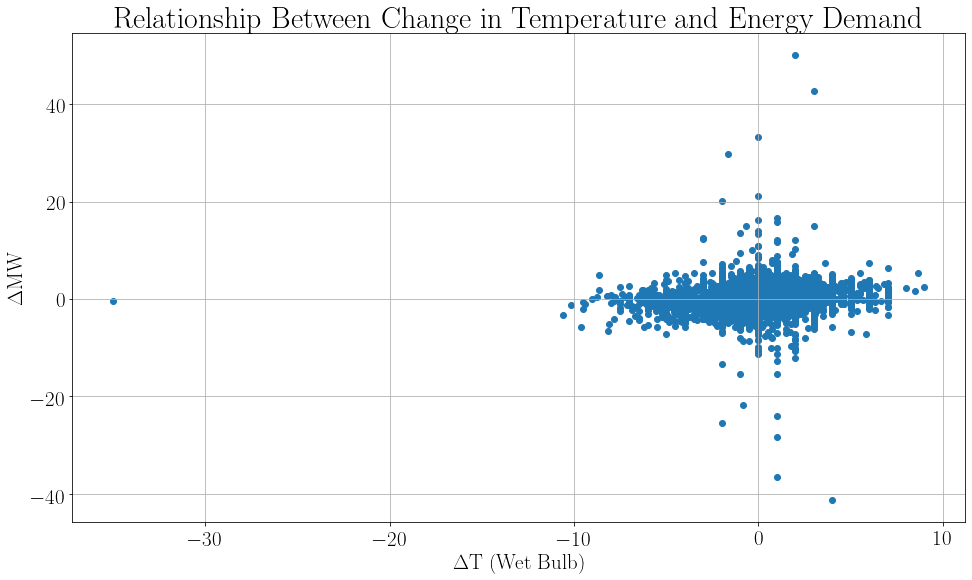

In [41]:
plt.scatter(deltawt, deltamw)
plt.xlabel(r"$\Delta$T (Wet Bulb)")
plt.ylabel(r"$\Delta$MW")
plt.title("Relationship Between Change in Temperature and Energy Demand")
plt.grid()
plt.show()

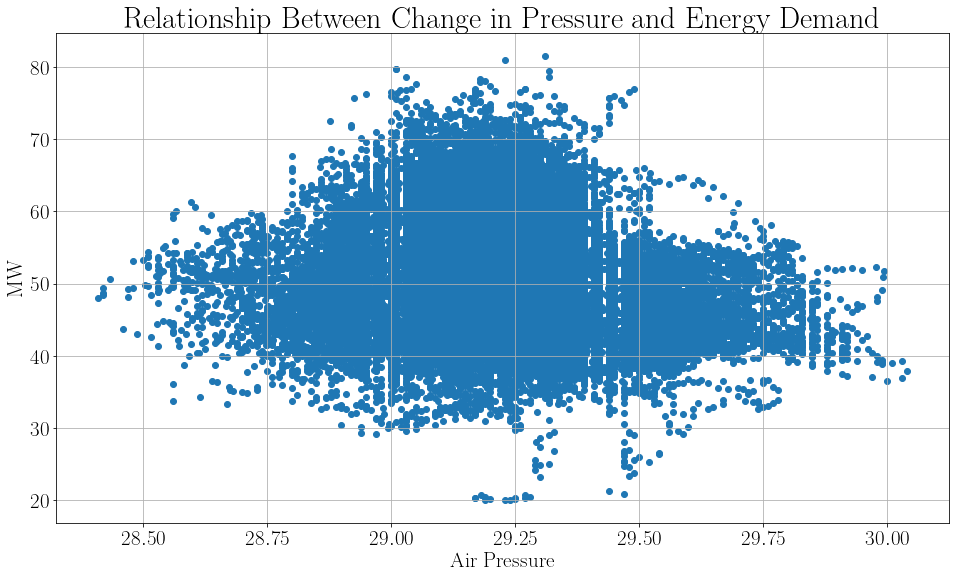

In [42]:
plt.scatter(combined_df.pressure, combined_df.mw)
plt.xlabel(r"Air Pressure")
plt.ylabel(r"MW")
plt.title("Relationship Between Change in Pressure and Energy Demand")
plt.grid()
plt.show()

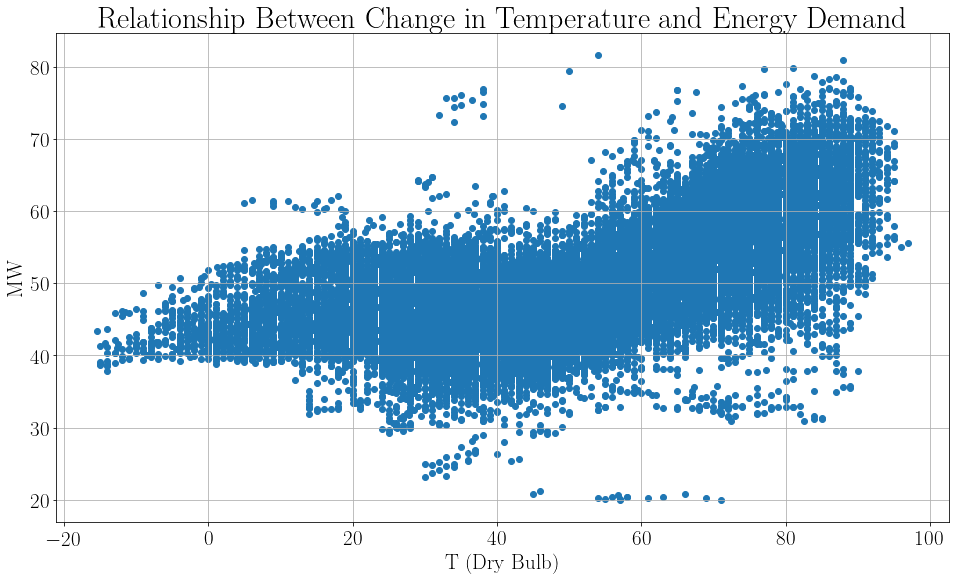

In [43]:
plt.scatter(combined_df.drytemp, combined_df.mw)
plt.xlabel(r"T (Dry Bulb)")
plt.ylabel(r"MW")
plt.title("Relationship Between Change in Temperature and Energy Demand")
plt.grid()
plt.show()

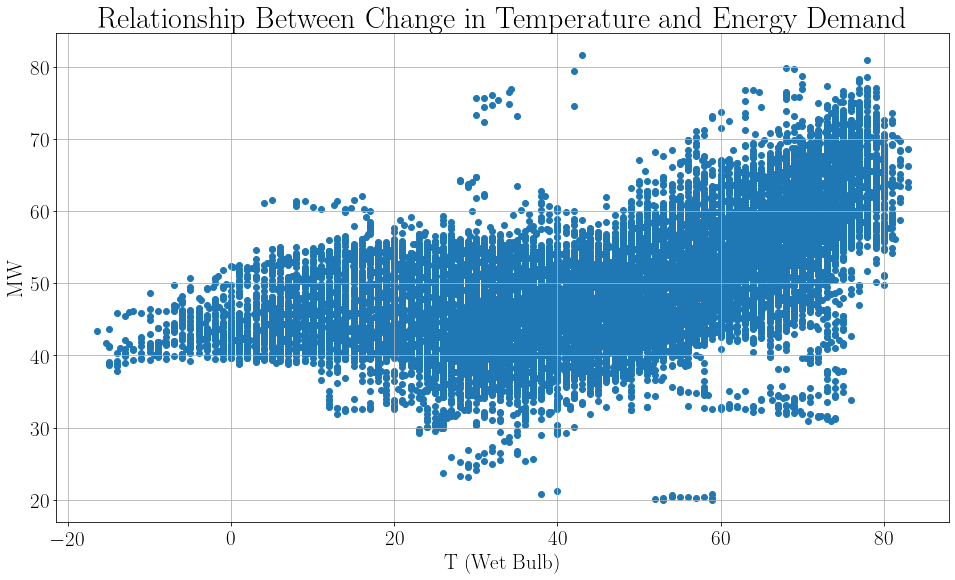

In [44]:
plt.scatter(combined_df.wettemp, combined_df.mw)
plt.xlabel(r"T (Wet Bulb)")
plt.ylabel(r"MW")
plt.title("Relationship Between Change in Temperature and Energy Demand")
plt.grid()
plt.show()

In [45]:
norm_demand = np.array(combined_df.mw)/np.linalg.norm(combined_df.mw, ord=np.inf)
norm_wettemp = np.array(combined_df.wettemp)/np.linalg.norm(combined_df.wettemp, ord=np.inf)
norm_drytemp = np.array(combined_df.drytemp)/np.linalg.norm(combined_df.drytemp, ord=np.inf)
norm_pressure = np.array(combined_df.pressure)/np.linalg.norm(combined_df.pressure, ord=np.inf)

norm_demand = np.array(combined_df.mw)/np.linalg.norm(combined_df.mw, ord=2)
norm_wettemp = np.array(combined_df.wettemp)/np.linalg.norm(combined_df.wettemp, ord=2)
norm_drytemp = np.array(combined_df.drytemp)/np.linalg.norm(combined_df.drytemp, ord=2)
norm_pressure = np.array(combined_df.pressure)/np.linalg.norm(combined_df.pressure, ord=2)

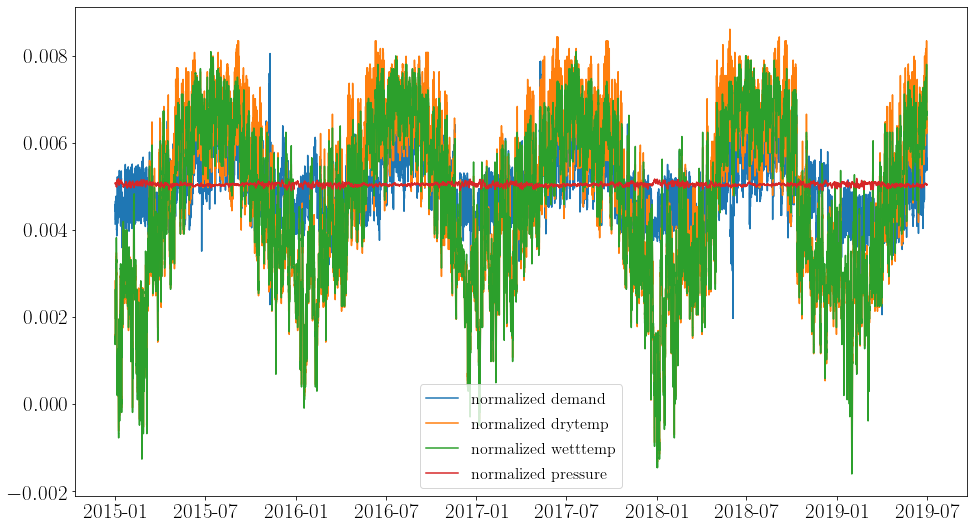

In [46]:
plt.plot(combined_df.index, norm_demand, label='normalized demand', alpha=1)
plt.plot(combined_df.index, norm_drytemp, label='normalized drytemp')
plt.plot(combined_df.index, norm_wettemp, label='normalized wetttemp')
plt.plot(combined_df.index, norm_pressure, label='normalized pressure')
plt.legend()
plt.show()

In [47]:
norm_drytemp

array([0.00150802, 0.00150802, 0.00141931, ..., 0.00638689, 0.0065643 ,
       0.00638689])

In [48]:
np.linalg.norm(combined_df.drytemp)

11273.094961138324

In [49]:
norm_drytemp = np.array(combined_df.drytemp)/np.linalg.norm(combined_df.drytemp, ord=np.inf)
norm_drytemp

array([0.17525773, 0.17525773, 0.16494845, ..., 0.74226804, 0.7628866 ,
       0.74226804])

In [50]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr

In [51]:
rval_p, _ = pearsonr(combined_df.wettemp, combined_df.mw)
rval_s, _ = spearmanr(combined_df.wettemp, combined_df.mw)

print(rval_p)
print(rval_s)

0.6727752382156497
0.718882116093537


In [52]:
rval_p, _ = pearsonr(combined_df.drytemp, combined_df.mw)
rval_s, _ = spearmanr(combined_df.drytemp, combined_df.mw)

print(rval_p)
print(rval_s)

0.6733251041463882
0.7109002766181812


In [53]:
rval_p, _ = pearsonr(combined_df.pressure, combined_df.mw)
rval_s, _ = spearmanr(combined_df.pressure, combined_df.mw)

print(rval_p)
print(rval_s)

-0.17677174659157838
-0.20168353440936151


In [54]:
rval_p, _ = pearsonr(combined_df.mw, combined_df.mw)
rval_s, _ = spearmanr(combined_df.mw, combined_df.mw)

print(rval_p)
print(rval_s)

1.0
1.0


In [56]:
rval_p, _ = pearsonr(combined_df.humidity, combined_df.mw)
rval_s, _ = spearmanr(combined_df.humidity, combined_df.mw)

print(rval_p)
print(rval_s)

-0.10471603236849936
-0.08993661347391915


In [57]:
rval_p, _ = pearsonr(combined_df.windspeed, combined_df.mw)
rval_s, _ = spearmanr(combined_df.windspeed, combined_df.mw)

print(rval_p)
print(rval_s)

-0.1659563818955798
-0.18459242527468464


In [58]:
from sunrise import generate_elevation_series
sun_elevation = generate_elevation_series(combined_df.index, timestamps=True)
combined_df['angle'] = sun_elevation

In [59]:
rval_p, _ = pearsonr(combined_df.angle, combined_df.mw)
rval_s, _ = spearmanr(combined_df.angle, combined_df.mw)

print(rval_p)
print(rval_s)

0.36506432020784835
0.35896133618474596


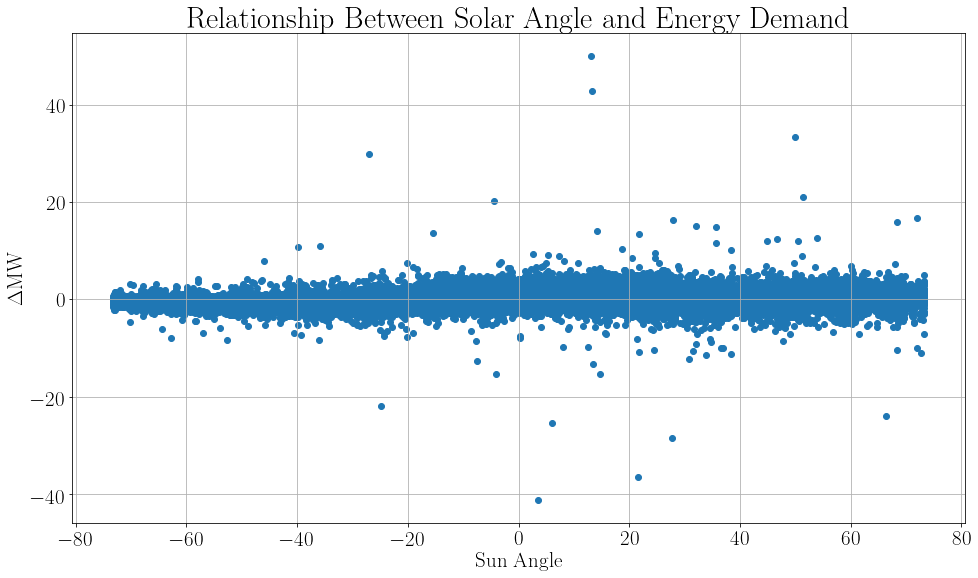

In [65]:
plt.scatter(combined_df.angle[:-1], np.diff(combined_df.mw))
plt.xlabel(r"Sun Angle")
plt.ylabel(r"$\Delta$MW")
plt.title("Relationship Between Solar Angle and Energy Demand")
plt.grid()
plt.show()

In [71]:
rval_p, _ = pearsonr(combined_df.angle, combined_df.pressure)
rval_s, _ = spearmanr(combined_df.angle, combined_df.pressure)

print(rval_p)
print(rval_s)

-0.08407482094688892
-0.08251316618466198


## Let's Extract the Fourier Trends

My argument is that temperature and demand have a stronger seasonal correlation than hourly.

Text(0, 0.5, 'PSD (dB) Wet Bulb Temp')

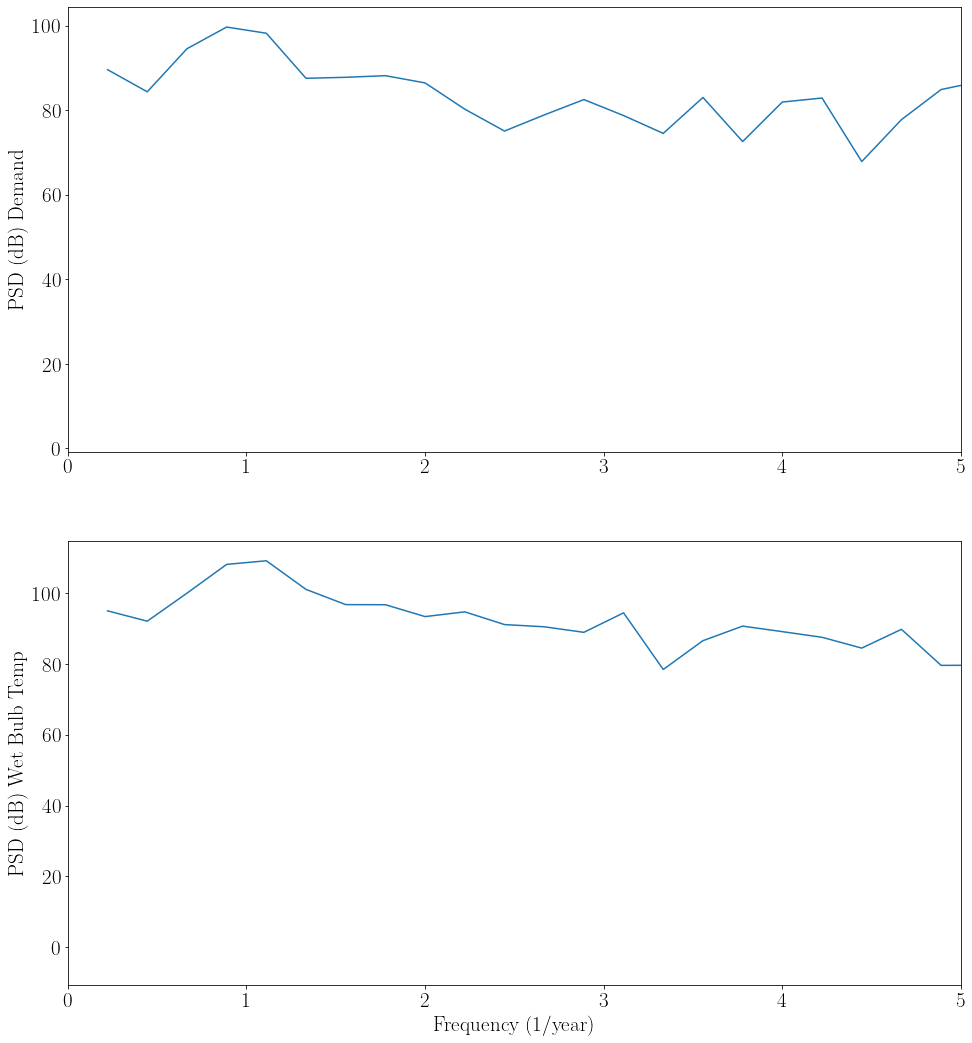

In [78]:
import scipy.fftpack as sft

# compute the fourier transform
demand = np.array(combined_df.mw)
wettemp = np.array(combined_df.wettemp)

demand_fft = sft.fft(demand)
wettemp_fft = sft.fft(wettemp)

# compute the spectral density
demand_psd = np.abs(demand_fft)**2
wettemp_psd = np.abs(wettemp_fft)**2

# get the frequencies
demand_freq = sft.fftfreq(len(demand_psd), 1./8760)
wettemp_freq = sft.fftfreq(len(wettemp_psd), 1./8760)

# obtain the real parts
i = demand_freq > 0
j = wettemp_freq > 0


fig, ax = plt.subplots(2, figsize=(16, 18))
ax[0].plot(demand_freq[i], 10 * np.log10(demand_psd[i]))
ax[0].set_xlim(0, 5)
ax[0].set_ylabel('PSD (dB) Demand')

ax[1].plot(wettemp_freq[i], 10 * np.log10(wettemp_psd[i]))
ax[1].set_xlim(0, 5)
ax[1].set_xlabel('Frequency (1/year)')
ax[1].set_ylabel('PSD (dB) Wet Bulb Temp')

Text(0, 0.5, 'Energy Demand')

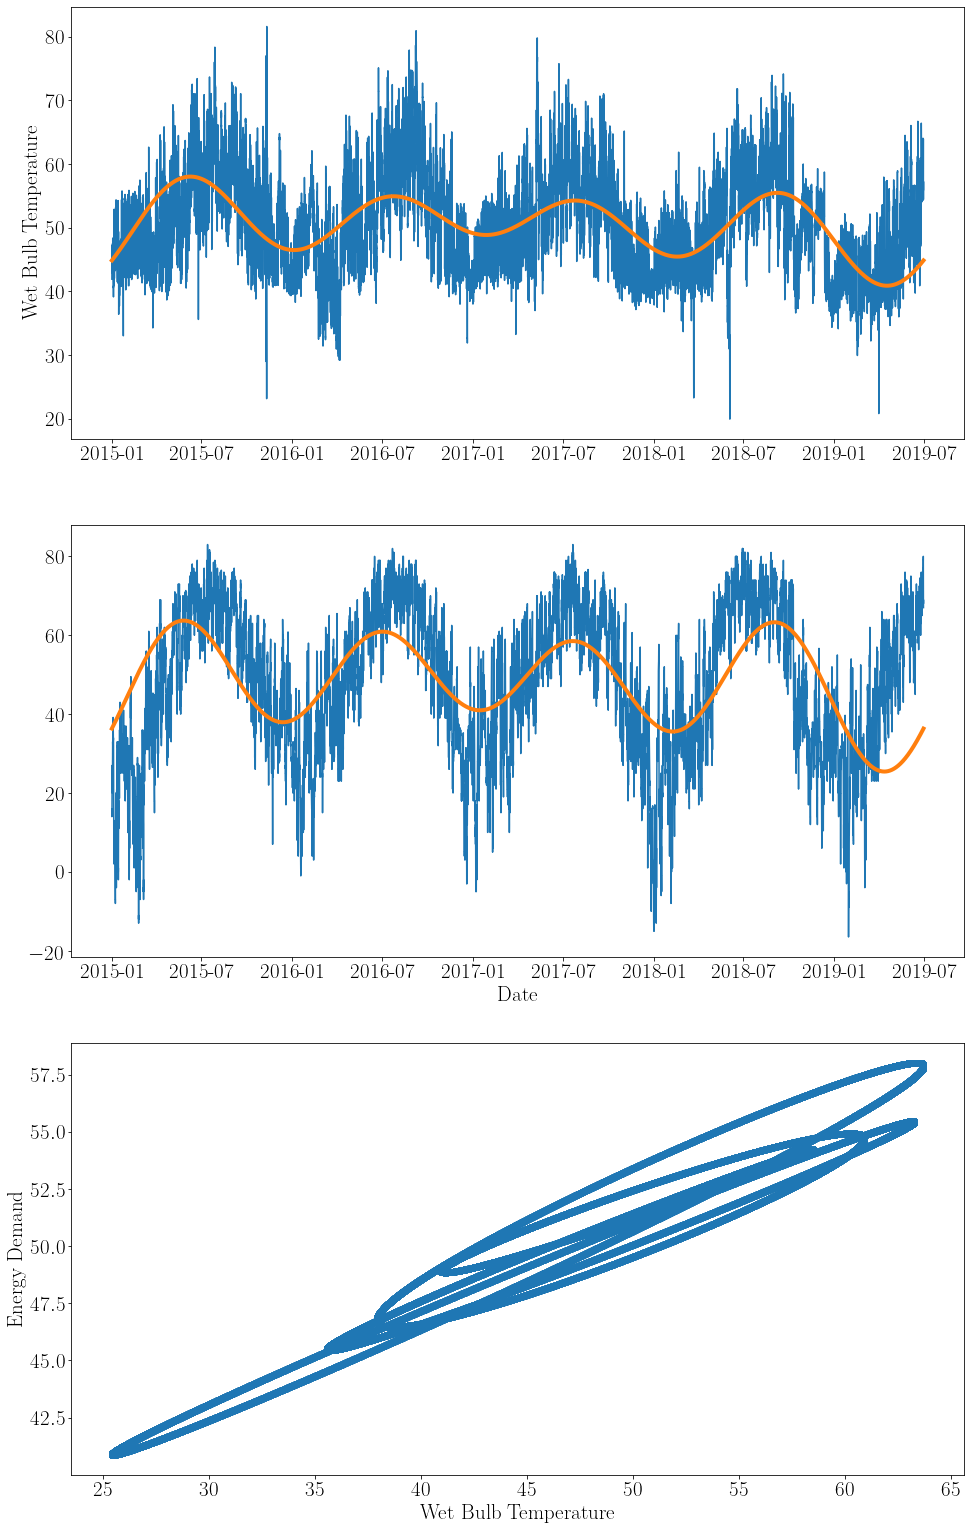

In [87]:
demand_fft_fund = demand_fft.copy()
demand_fft_fund[np.abs(demand_freq)>1.1] = 0
wettemp_fft_fund = wettemp_fft.copy()
wettemp_fft_fund[np.abs(wettemp_freq)>1.1] = 0

demand_yearly = np.real(sft.ifft(demand_fft_fund))
wettemp_yearly = np.real(sft.ifft(wettemp_fft_fund))

fig, ax = plt.subplots(3, figsize=(16, 27))
ax[0].plot(combined_df.index, combined_df.mw)
ax[0].plot(combined_df.index, demand_yearly, '-',lw=4)
ax[1].set_xlabel('Date')
ax[0].set_ylabel('Energy Demand (MW)')
ax[1].plot(combined_df.index, combined_df.wettemp)
ax[1].plot(combined_df.index, wettemp_yearly, '-',lw=4)
ax[1].set_xlabel('Date')
ax[0].set_ylabel('Wet Bulb Temperature')
ax[2].scatter(wettemp_yearly, demand_yearly)
ax[2].set_xlabel('Wet Bulb Temperature')
ax[2].set_ylabel('Energy Demand')

In [88]:
demand_yearly

array([44.85329643, 44.85741117, 44.8615274 , ..., 44.84096111,
       44.8450714 , 44.84918317])

In [89]:
wettemp_yearly

array([36.33869918, 36.34889757, 36.35909878, ..., 36.30812091,
       36.31831085, 36.3285036 ])

In [90]:
rval_p, _ = pearsonr(wettemp_yearly, demand_yearly)
rval_s, _ = spearmanr(wettemp_yearly, demand_yearly)

print(rval_p)
print(rval_s)

0.9703345511951249
0.968272044601425
